In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [65]:
class dataprocess():
    def __init__(self):
        pass

    def getdata(self, file):
        data = pd.read_excel(file)
        return data
    def dataExtract(self, data):
        data=data[['Disaster Type','Disaster Subtype','Country',
                   'Location','Start Year','End Year','Start Month']]
        data=data.dropna()
        data['Start Month']=data['Start Month'].astype(int)
        data.sort_values(['Start Year','Country','Start Month','Disaster Subtype']).reset_index(drop=True)


        grouped = data.groupby(['Start Year', 'Country', #'Start Month',
                                'Disaster Subtype'])
        counts = grouped.size().reset_index(name='COUNT')

        event_types = counts['Disaster Subtype'].unique()
        dictionary = pd.DataFrame(columns=['事件种类'])
        dictionary['事件种类'] = event_types

        return counts,dictionary
    # 将处理好的数据导出为excel文件
    def out(self,data,filename):
        data.to_csv('{}.csv'.format(filename), index=False)

In [67]:
data=dataprocess()
file1=r"D:\VSCodeWorkSpace\2024_C\data\public_emdat_custom_request_2024-02-02_dd97d827-78f7-4070-9c73-86139a6f2f2d.xlsx"
file2=r"D:\VSCodeWorkSpace\2024_C\data\public_emdat_custom_request_2024-02-02_7d30c6e3-dd6a-49d6-a677-2ff9ff7a6aee.xlsx"
data_US=data.getdata(file1)
data_US,dictionary=data.dataExtract(data_US)
data.out(data_US,'data_USA')
data.out(dictionary,'dictionary')
data_US

,Start Year,Country,Disaster Subtype,COUNT
0,2000,Argentina,Blizzard/Winter storm,1
1,2000,Argentina,Cold wave,1
2,2000,Argentina,Flood (General),3
3,2000,Argentina,Forest fire,1
4,2000,Argentina,Lightning/Thunderstorms,1
...,...,...,...,...
1349,2023,United States of America,Wildfire (General),2
1350,2023,Uruguay,Drought,1
1351,2023,Uruguay,Flood (General),1
1352,2023,Uruguay,Severe weather,1


In [61]:
total_occurrences1 = data_US.groupby(['Country', 'Disaster Subtype'])['COUNT'].sum().reset_index()
data.out(total_occurrences1,'total_occurrences_USA')
total_occurrences1

,Country,Disaster Subtype,COUNT
0,Antigua and Barbuda,Tropical cyclone,3
1,Argentina,Ash fall,3
2,Argentina,Blizzard/Winter storm,1
3,Argentina,Cold wave,5
4,Argentina,Drought,3
...,...,...,...
307,Venezuela (Bolivarian Republic of),Flood (General),13
308,Venezuela (Bolivarian Republic of),Landslide (wet),2
309,Venezuela (Bolivarian Republic of),Riverine flood,16
310,Venezuela (Bolivarian Republic of),Severe weather,1


### 获得2000-2024年间极端天气事件的次数
##### 可以由此获得极端天气发生的频率

In [66]:
data_AISA=data.getdata(file2)
data_AISA,dic=data.dataExtract(data_AISA)
data.out(data_AISA,'data_AISA')
total_occurrences2 = data_AISA.groupby(['Country', 'Disaster Subtype'])['COUNT'].sum().reset_index()
data.out(total_occurrences2,'total_occurrences_AISA')
total_occurrences2

,Country,Disaster Subtype,COUNT
0,Afghanistan,Avalanche (wet),16
1,Afghanistan,Blizzard/Winter storm,6
2,Afghanistan,Cold wave,4
3,Afghanistan,Drought,6
4,Afghanistan,Flash flood,37
...,...,...,...
427,Yemen,Flood (General),11
428,Yemen,Landslide (wet),3
429,Yemen,Riverine flood,11
430,Yemen,Storm (General),2


C:\Users\JiangJinrui\AppData\Local\Temp\ipykernel_58076\3821716998.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

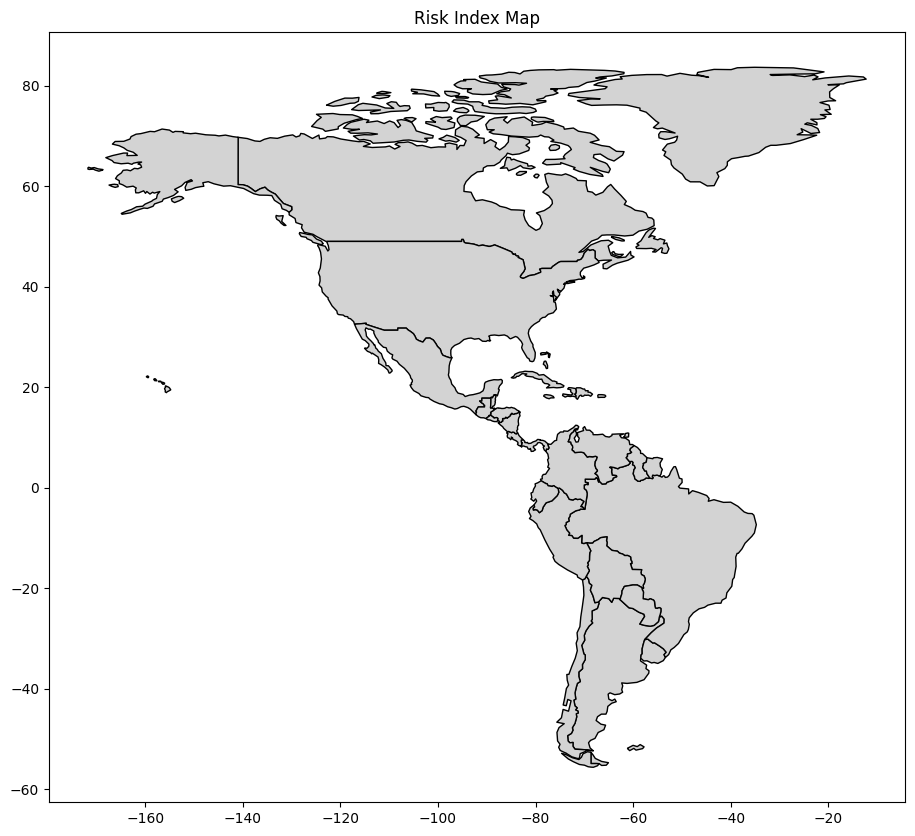

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import requests
# 假设 risk_data DataFrame 包含国家名称和风险指数的列

# 加载南北美洲地理数据
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world[(world['continent'] == 'North America') | (world['continent'] == 'South America')]

# 合并风险指数数据和地理数据
# merged_data = americas.merge(risk_data, left_on='name', right_on='Country')
# 获取地图图像
# url = "https://api.mapbox.com/styles/v1/mapbox/satellite-streets-v11/static/-120,0,1.5,0,0/800x600?access_token=YOUR_MAPBOX_ACCESS_TOKEN"
# response = requests.get(url)
# with open("satellite_image.jpg", "wb") as f:
#     f.write(response.content)
# 创建绘图
fig, ax = plt.subplots(figsize=(16, 10))

# 绘制地图

# 绘制卫星图
# ax.imshow(plt.imread('path_to_satellite_image.jpg'), extent=[-180, -30, -60, 80], aspect='auto')
americas.plot(ax=ax, color='lightgray', edgecolor='black')
# merged_data.plot(column='Risk Index', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='black', legend=True)

# 添加标题和颜色图例
plt.title('Risk Index Map')
plt.colorbar(label='Risk Index')

# 显示地图
plt.show()